<a href="https://colab.research.google.com/github/Zaheer-10/HuggingFace-Transformers_and_pipeline/blob/main/Hugging_face_Transformer_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hugging Face Transformers - How to use Pipelines

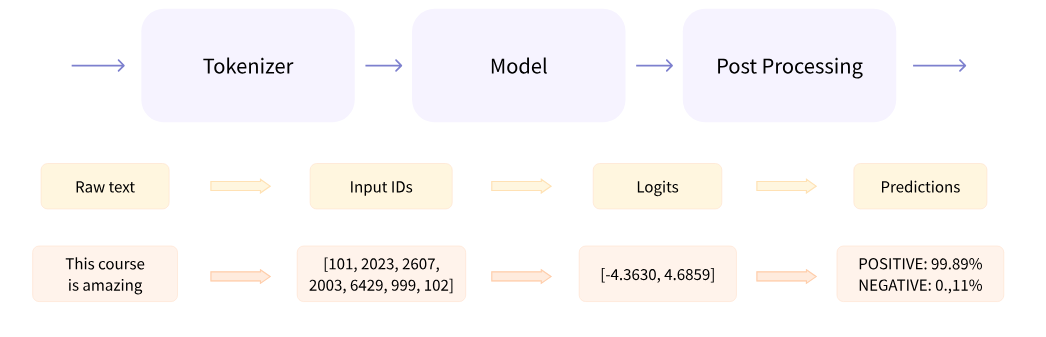

In [ ]:
!pip install transformers

**Text generation**

In [ ]:
from transformers import pipeline, set_seed
import warnings
warnings.filterwarnings("ignore")

In [ ]:
generator = pipeline('text-generation', model='gpt2')
set_seed(42)
generator("Hello, I like to play cricket,", max_length=60, num_return_sequences=7)

Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Hello, I like to play cricket, but what I do in that sport is different—I've been here for over 12 years, and I've heard what people were saying: 'Well, your father should have been playing cricket in this country by now'. The first thing to know is that people"},
 {'generated_text': 'Hello, I like to play cricket, sometimes, but they\'re the same rules," said his nephew, who has been playing cricket for many years and has not been seen on television.\n\n\'One bad cricket match might not be enough\'\n\nA year ago the retired ex-colleg'},
 {'generated_text': "Hello, I like to play cricket, but I've never been in a place that can get me started as a bat pro, so that has to be my goal.\n\nWith the Ashes there is just too much talk about the World Cup qualifiers and how they don't get any more important."},
 {'generated_text': 'Hello, I like to play cricket, not cricket."\n\nAnd you\'re not the smartest.\n\n"Yeah, yeah, yeah, yeah. Actually, I\'m pretty good at cricket

In [ ]:
generator("The Indian man worked as a", max_length=10, num_return_sequences=5)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'The Indian man worked as a tailor in London before'},
 {'generated_text': 'The Indian man worked as a journalist and television journalist'},
 {'generated_text': 'The Indian man worked as a mechanic. He was'},
 {'generated_text': 'The Indian man worked as a waiter at a restaurant'},
 {'generated_text': 'The Indian man worked as a carpenter. One'}]

In [ ]:
generator("Machine learning is evolving technology", max_length=10, num_return_sequences=5)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Machine learning is evolving technology in a way that will'},
 {'generated_text': 'Machine learning is evolving technology. The first step is'},
 {'generated_text': 'Machine learning is evolving technology to better understand human behaviors'},
 {'generated_text': 'Machine learning is evolving technology to help computers learn complex'},
 {'generated_text': "Machine learning is evolving technology, and it's changing"}]

*Sentiment analysis*

In [ ]:
# Allocate a pipeline for sentiment-analysis
classifier = pipeline('sentiment-analysis')
classifier('The secret of getting ahead is getting started.')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9970657229423523}]

### Question Answering

In [ ]:
# Allocate a pipeline for question-answering
question_answerer = pipeline('question-answering')
question_answerer({
    'question': 'What is the Newtons third law of motion?',
    'context': 'Newton’s third law of motion states that, "For every action there is equal and opposite reaction"'})

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'score': 0.6062518954277039,
 'start': 42,
 'end': 97,
 'answer': '"For every action there is equal and opposite reaction"'}

In [ ]:
nlp = pipeline("question-answering")

context = r"""
Micorsoft was founded by Bill gates and Paul allen in the year 1975.
The property of being prime (or not) is called primality.
A simple but slow method of verifying the primality of a given number n is known as trial division.
It consists of testing whether n is a multiple of any integer between 2 and itself.
Algorithms much more efficient than trial division have been devised to test the primality of large numbers.
These include the Miller–Rabin primality test, which is fast but has a small probability of error, and the AKS primality test, which always produces the correct answer in polynomial time but is too slow to be practical.
Particularly fast methods are available for numbers of special forms, such as Mersenne numbers.
As of January 2016, the largest known prime number has 22,338,618 decimal digits.
"""

#Question 1
result = nlp(question="What is a simple method to verify primality?", context=context)

print(f"Answer 1: '{result['answer']}'")

#Question 2
result = nlp(question="When did Bill gates founded Microsoft?", context=context)

print(f"Answer 2: '{result['answer']}'")

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


Answer 1: 'trial division'
Answer 2: '1975'


### Text prediction

In [ ]:
unmasker = pipeline('filbl-mask', model='bert-base-cased')
unmasker("Hello, My name is [MASK].")

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'score': 0.007879075594246387,
  'token': 1681,
  'token_str': 'David',
  'sequence': 'Hello, My name is David.'},
 {'score': 0.007307358086109161,
  'token': 5036,
  'token_str': 'Kate',
  'sequence': 'Hello, My name is Kate.'},
 {'score': 0.007054013665765524,
  'token': 2687,
  'token_str': 'Sam',
  'sequence': 'Hello, My name is Sam.'},
 {'score': 0.00619702972471714,
  'token': 1600,
  'token_str': 'James',
  'sequence': 'Hello, My name is James.'},
 {'score': 0.006146731786429882,
  'token': 4117,
  'token_str': 'Charlie',
  'sequence': 'Hello, My name is Charlie.'}]

### Text Summarization


In [ ]:
from transformers import pipeline


In [ ]:
summarizer = pipeline("summarization")

ARTICLE = """The Apollo program, also known as Project Apollo, was the third United States human spaceflight program carried out by the National Aeronautics and Space Administration (NASA), which accomplished landing the first humans on the Moon from 1969 to 1972.
First conceived during Dwight D. Eisenhower's administration as a three-man spacecraft to follow the one-man Project Mercury which put the first Americans in space,
Apollo was later dedicated to President John F. Kennedy's national goal of "landing a man on the Moon and returning him safely to the Earth" by the end of the 1960s, which he proposed in a May 25, 1961, address to Congress.
Project Mercury was followed by the two-man ProjectGemini (1962–66).
The first manned flight of Apollo was in 1968.
Apollo ran from 1961 to 1972, and was supported by the two-man Gemini program which ran concurrently with it from 1962 to 1966.
Gemini missions developed some of the space travel techniques that were necessary for the success of the Apollo missions.
Apollo used Saturn family rockets as launch vehicles.
Apollo/Saturn vehicles were also used for an Apollo Applications Program, which consisted of Skylab, a space station that supported three manned missions in 1973–74, and the Apollo–Soyuz Test Project, a joint Earth orbit mission with the Soviet Union in 1975.
 """

summary=summarizer(ARTICLE, max_length=130, min_length=30, do_sample=False)[0]

print(summary['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


 The first manned flight of Apollo ran from 1961 to 1972 . The Apollo program was followed by the two-man ProjectGemini . It was the third mission to land on the Moon .


### English to German translation

In [ ]:
# English to German
translator_ger = pipeline("translation_en_to_de")
print("German: ",translator_ger("Joe Biden became the 46th president of U.S.A.", max_length=40)[0]['translation_text'])

# English to French
translator_fr = pipeline('translation_en_to_fr')
print("French: ",translator_fr("Joe Biden became the 46th president of U.S.A",  max_length=40)[0]['translation_text'])

No model was supplied, defaulted to t5-base and revision 686f1db (https://huggingface.co/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


No model was supplied, defaulted to t5-base and revision 686f1db (https://huggingface.co/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


German:  Joe Biden wurde der 46. Präsident der USA.
French:  Joe Biden est devenu le 46e président des États-Unis


### Chatbot

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

tokenizer = AutoTokenizer.from_pretrained("microsoft/DialoGPT-medium")
model = AutoModelForCausalLM.from_pretrained("microsoft/DialoGPT-medium")

# Let's chat for 5 lines
for step in range(5):
    # encode the new user input, add the eos_token and return a tensor in Pytorch
    new_user_input_ids = tokenizer.encode(input(">> User:") + tokenizer.eos_token, return_tensors='pt')

    # append the new user input tokens to the chat history
    bot_input_ids = torch.cat([chat_history_ids, new_user_input_ids], dim=-1) if step > 0 else new_user_input_ids

    # generated a response while limiting the total chat history to 1000 tokens,
    chat_history_ids = model.generate(bot_input_ids, max_length=1000, pad_token_id=tokenizer.eos_token_id)

    # pretty print last ouput tokens from bot
    print("DialoGPT: {}".format(tokenizer.decode(chat_history_ids[:, bot_input_ids.shape[-1]:][0], skip_special_tokens=True)))

### Named Entity Recognition

In [ ]:
nlp_token_class = pipeline('ner')
nlp_token_class('Ronaldo was born in 1985, he plays for Juventus and Portugal. ')

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'entity': 'I-PER',
  'score': 0.9978648,
  'index': 1,
  'word': 'Ronald',
  'start': 0,
  'end': 6},
 {'entity': 'I-PER',
  'score': 0.9990381,
  'index': 2,
  'word': '##o',
  'start': 6,
  'end': 7},
 {'entity': 'I-ORG',
  'score': 0.9977496,
  'index': 11,
  'word': 'Juventus',
  'start': 39,
  'end': 47},
 {'entity': 'I-LOC',
  'score': 0.9991247,
  'index': 13,
  'word': 'Portugal',
  'start': 52,
  'end': 60}]

**Zero-shot Learning**


Zero-Shot learning method aims to solve a task without receiving any example of *that* task at training phase.

In [ ]:
from transformers import pipeline, set_seed

classifier_zsl = pipeline("zero-shot-classification")

sequence_to_classify = "Bill gates founded a company called Microsoft in the year 1975"
candidate_labels = ["Europe", "Sports",'Leadership','business', "politics","startup"]
classifier_zsl(sequence_to_classify, candidate_labels)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'sequence': 'Bill gates founded a company called Microsoft in the year 1975',
 'labels': ['business',
  'startup',
  'Leadership',
  'Europe',
  'Sports',
  'politics'],
 'scores': [0.6144777536392212,
  0.18745550513267517,
  0.18227839469909668,
  0.006684542167931795,
  0.006318533327430487,
  0.0027852640487253666]}

**Features Extraction**

In [ ]:
import numpy as np
nlp_features = pipeline('feature-extraction')
output = nlp_features('Deep learning is a branch of Machine learning')
np.array(output).shape   # output: (Samples, Tokens, Vector Size)

No model was supplied, defaulted to distilbert-base-cased and revision 935ac13 (https://huggingface.co/distilbert-base-cased).
Using a pipeline without specifying a model name and revision in production is not recommended.


Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


(1, 10, 768)

### Using transformers in Widgets

In [ ]:
import ipywidgets as widgets

nlp_qaA = pipeline('question-answering')

context = widgets.Textarea(
    value='Einstein is famous for the general theory of relativity',
    placeholder='Enter something',
    description='Context:',
    disabled=False
)

query = widgets.Text(
    value='Why is Einstein famous for ?',
    placeholder='Enter something',
    description='Question:',
    disabled=False
)

def forward(_):
    if len(context.value) > 0 and len(query.value) > 0:
        output = nlp_qaA(question=query.value, context=context.value)
        print(output)

query.on_submit(forward)
display(context, query)

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


Textarea(value='Einstein is famous for the general theory of relativity', description='Context:', placeholder=…

Text(value='Why is Einstein famous for ?', description='Question:', placeholder='Enter something')

# Classifying text with DistilBERT and Tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import activations, optimizers, losses
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
import pickle

In [ ]:
 x = [
     'Great customer service! The food was delicious! Definitely a come again.',
     'The VEGAN options are super fire!!! And the plates come in big portions. Very pleased with this spot, I\'ll definitely be ordering again',
     'Come on, this place is family owned and operated, they are super friendly, the tacos are bomb.',
     'This is such a great restaurant. Multiple times during days that we don\'t want to cook, we\'ve done takeout here and it\'s been amazing. It\'s fast and delicious.',
     'Staff is really nice. Food is way better than average. Good cost benefit.',
     'pricing for this, while relatively inexpensive for a Las Vegas attraction, is completely over the top.',
     'At such a *fine* institution, I find the lack of knowledge and respect for the art appalling',
     'If I could give one star I would...I walked out before my food arrived the customer service was horrible!',
     'Wow the slowest drive thru I\'ve ever been at WOWWWW. Horrible I won\'t be coming back here ever again',
     'Service: 1 out of 5 stars. They will mess up your order, not have it ready after 30 mins calling them before. Worst ran family business Ive ever seen.'
]

y = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]

### 1. Preprocessing the data

In [ ]:
MODEL_NAME = 'distilbert-base-uncased'
MAX_LEN = 20

review = x[0]

tkzr = DistilBertTokenizer.from_pretrained(MODEL_NAME)

inputs = tkzr(review, max_length=MAX_LEN, truncation=True, padding=True)

print(f'review: \'{review}\'')
print(f'input ids: {inputs["input_ids"]}')
print(f'attention mask: {inputs["attention_mask"]}')

review: 'Great customer service! The food was delicious! Definitely a come again.'
input ids: [101, 2307, 8013, 2326, 999, 1996, 2833, 2001, 12090, 999, 5791, 1037, 2272, 2153, 1012, 102]
attention mask: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Apply this transformation to each review in our corpus. To do this we define a function construct_encodings, which maps the tokenizer to each review and aggregates them in encodings:

In [ ]:
def construct_encodings(x, tkzr, max_len, trucation=True, padding=True):
    return tkzr(x, max_length=max_len, truncation=trucation, padding=padding)

encodings = construct_encodings(x, tkzr, max_len=MAX_LEN)

#The first stage of preprocessing is done! The second stage is converting our encodings and y (which holds the classes of the reviews) into a Tensorflow Dataset object. Below is a function to do this:
def construct_tfdataset(encodings, y=None):
    if y:
        return tf.data.Dataset.from_tensor_slices((dict(encodings),y))
    else:
        # this case is used when making predictions on unseen samples after training
        return tf.data.Dataset.from_tensor_slices(dict(encodings))

tfdataset = construct_tfdataset(encodings, y)

In [ ]:
TEST_SPLIT = 0.2
BATCH_SIZE = 2

train_size = int(len(x) * (1-TEST_SPLIT))

tfdataset = tfdataset.shuffle(len(x))
tfdataset_train = tfdataset.take(train_size)
tfdataset_test = tfdataset.skip(train_size)

tfdataset_train = tfdataset_train.batch(BATCH_SIZE)
tfdataset_test = tfdataset_test.batch(BATCH_SIZE)

### 2. Fine-tuning the model

In [ ]:
N_EPOCHS = 2

model = TFDistilBertForSequenceClassification.from_pretrained(MODEL_NAME)
optimizer = optimizers.Adam(learning_rate=3e-5)
loss = losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

model.fit(tfdataset_train, batch_size=BATCH_SIZE, epochs=N_EPOCHS)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

Epoch 1/2
4/4 [==============================] - 22s 710ms/step - loss: 0.6858 - accuracy: 0.6250
Epoch 2/2
4/4 [==============================] - 3s 664ms/step - loss: 0.6435 - accuracy: 0.5000


### 3. Testing the model


In [ ]:
benchmarks = model.evaluate(tfdataset_test, return_dict=True, batch_size=BATCH_SIZE)
print(benchmarks)

### 4. Using the fine-tuned model to predict new samples

In [ ]:
def create_predictor(model, model_name, max_len):
    tkzr = DistilBertTokenizer.from_pretrained(model_name)
    def predict_proba(text):
        x = [text]

        encodings = construct_encodings(x, tkzr, max_len=max_len)
        tfdataset = construct_tfdataset(encodings)
        tfdataset = tfdataset.batch(1)

        preds = model.predict(tfdataset)
        preds = activations.softmax(tf.convert_to_tensor(preds)).numpy()
        return preds[0][0]

    return predict_proba

clf = create_predictor(model, MODEL_NAME, MAX_LEN)
print(clf('this restaurant has horrible food'))

### 5. Saving and loading the model for future use

In [ ]:
model.save_pretrained('./model/clf')
with open('./model/info.pkl', 'wb') as f:
    pickle.dump((MODEL_NAME, MAX_LEN), f)

In [ ]:
new_model = TFDistilBertForSequenceClassification.from_pretrained('./model/clf')
model_name, max_len = pickle.load(open('./model/info.pkl', 'rb'))

clf = create_predictor(new_model, model_name, max_len)
print('Sentiment [pos, neg]: ',clf('this restaurant has poor ambiance.'))